# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

**Problem Statement**
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

A) Inpatient Data

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

B) Outpatient Data

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) Beneficiary Details Data

This data contains beneficiary KYC details like health conditions,region they belong to etc

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #advanced plotting
import matplotlib.pyplot as plt #plots
from scipy.stats import norm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,roc_curve, auc, RocCurveDisplay,accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_train_ben = pd.read_csv(r"C:\Users\lenin\Downloads\Train_Beneficiarydata-1542865627584.csv\Train_Beneficiarydata-1542865627584.csv")
df_train_prov = pd.read_csv(r"C:\Users\lenin\Downloads\Train-1542865627584.csv")
df_train_inpatient = pd.read_csv(r"C:\Users\lenin\Downloads\Train_Inpatientdata-1542865627584.csv\Train_Inpatientdata-1542865627584.csv")
df_train_outpatient= pd.read_csv(r"C:\Users\lenin\Downloads\Train_Outpatientdata-1542865627584.csv\Train_Outpatientdata-1542865627584.csv")

In [6]:
Train_Allpatientdata=pd.merge(df_train_outpatient,df_train_inpatient,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

* An outer join includes all records from both DataFrames, even if there is no match in the other. This is useful because not all patients have both inpatient and outpatient records.
* It avoids data loss whereas using an inner join would only keep rows that exist in both datasets with all matching fields—likely excluding many claims that only exist in one of the datasets.

In [8]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,df_train_ben,on="BeneID")
Train_Allpatientdata=pd.merge(Train_Allpatientdata,df_train_prov)

In [9]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1938-03-01,NaN,1,1,0,49,430,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1938-03-01,NaN,1,1,0,49,430,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,64880,NaN,NaN,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36401,NaN,NaN,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78009,NaN,NaN,NaN,1939-08-01,NaN,1,1,0,33,420,12,12,1,2,2,2,2,2,2,1,1,2,1,0,0,2530,540,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,V420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,V7283,NaN,NaN,NaN,1936-05-01,NaN,2,1,0,29,150,12,12,2,2,2,1,2,2,1,1,1,2,2,0,0,1270,690,No
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1936-05-01,NaN,2,1,0,29,150,12,12,2,2,2,1,2,2,1,1,1,2,2,0,0,1270,690,No
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1936-05-01,NaN,2,1,0,29,150,12,12,2,2,2,1,2,2,1,1,1,2,2,0,0,1270,690,No
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78720,NaN,NaN,NaN,1936-05-01,NaN,2,1,0,29,150,12,12,2,2,2,1,2,2,1,1,1,2,2,0,0,1270,690,No


In [10]:
Train_Allpatientdata_copy = Train_Allpatientdata.copy()

*  Creating a backup copy of the merged patient data DataFrame to preserve the original before further processing or modification.


In [12]:
Train_Allpatientdata_copy.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [13]:
Train_Allpatientdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [14]:
Train_Allpatientdata_copy.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,558211.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,78.421085,1.578838,1.255011,25.446969,378.588195,11.931472,11.93877,1.598132,1.409573,1.587998,1.848615,1.687070,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745
std,3821.534891,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,274.016812,0.493746,0.717437,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811
min,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,40.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,0.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,80.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,0.000000,2.000000,1.000000,24.000000,350.000000,12.000000,12.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,300.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,0.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000
max,125000.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1068.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [15]:
Train_Allpatientdata_copy.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                

🔍 Check the total number of missing (`NaN`) values in each column of the copied patient data to identify where data cleaning may be needed.


In [17]:
Train_Allpatientdata_copy.nunique()

BeneID                             138556
ClaimID                            558211
ClaimStartDt                          398
ClaimEndDt                            366
Provider                             5410
InscClaimAmtReimbursed                438
AttendingPhysician                  82063
OperatingPhysician                  35315
OtherPhysician                      46457
ClmDiagnosisCode_1                  10450
ClmDiagnosisCode_2                   5300
ClmDiagnosisCode_3                   4756
ClmDiagnosisCode_4                   4359
ClmDiagnosisCode_5                   3970
ClmDiagnosisCode_6                   3607
ClmDiagnosisCode_7                   3388
ClmDiagnosisCode_8                   3070
ClmDiagnosisCode_9                   2774
ClmDiagnosisCode_10                  1158
ClmProcedureCode_1                   1117
ClmProcedureCode_2                    300
ClmProcedureCode_3                    154
ClmProcedureCode_4                     48
ClmProcedureCode_5                

🔢 Display the number of unique values in each column of the copied patient data to understand column variability and potential categorical features.


In [19]:
Train_Allpatientdata_copy.duplicated().sum()

0

In [20]:
Train_Allpatientdata_copy.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedureCode_3                 float64
ClmProcedureCode_4                 float64
ClmProcedur

In [21]:
date_cols = ['ClaimStartDt', 'ClaimEndDt', 'DOB',"DOD"]
for col in date_cols:
    Train_Allpatientdata_copy[col] = pd.to_datetime(Train_Allpatientdata_copy[col], errors='coerce')

📆 Convert specified columns to datetime format, coercing invalid entries to `NaT`, to enable date-based operations and calculations.


In [23]:
Train_Allpatientdata_copy.DOD.median()

Timestamp('2009-09-01 00:00:00')

This tells us that year of birth ranges from 1909 to 1983, if we take the greatest date in DOD and assume that it is the year of death for all the patients where DOD is not given, we will get the Age of every patient.

In [25]:
# Convert DOB and DOD to datetime
Train_Allpatientdata_copy['DOB'] = pd.to_datetime(Train_Allpatientdata_copy['DOB'], errors='coerce')
Train_Allpatientdata_copy['DOD'] = pd.to_datetime(Train_Allpatientdata_copy['DOD'], errors='coerce')

# Get the greatest DOD for substitution where DOD is NaT
greatest_DOD = Train_Allpatientdata_copy['DOD'].max()

# Use .where to replace NaT DODs with greatest_DOD
effective_dod = Train_Allpatientdata_copy['DOD'].where(Train_Allpatientdata_copy['DOD'].notna(), greatest_DOD)

# Calculate age
Train_Allpatientdata_copy['age_in_years'] = ((effective_dod - Train_Allpatientdata_copy['DOB']).dt.days / 365).round()

# Drop intermediate 'age' column if it existed before
Train_Allpatientdata_copy.drop(columns=['age'], errors='ignore', inplace=True)


In [26]:
Train_Allpatientdata_copy = Train_Allpatientdata_copy[Train_Allpatientdata_copy["age_in_years"] <= 100]

* **1678** rows have bee deleted whose age is greater than 100

In [28]:
Train_Allpatientdata_copy.age_in_years.describe()

count    556533.000000
mean         73.687668
std          12.955888
min          26.000000
25%          68.000000
50%          75.000000
75%          82.000000
max         100.000000
Name: age_in_years, dtype: float64

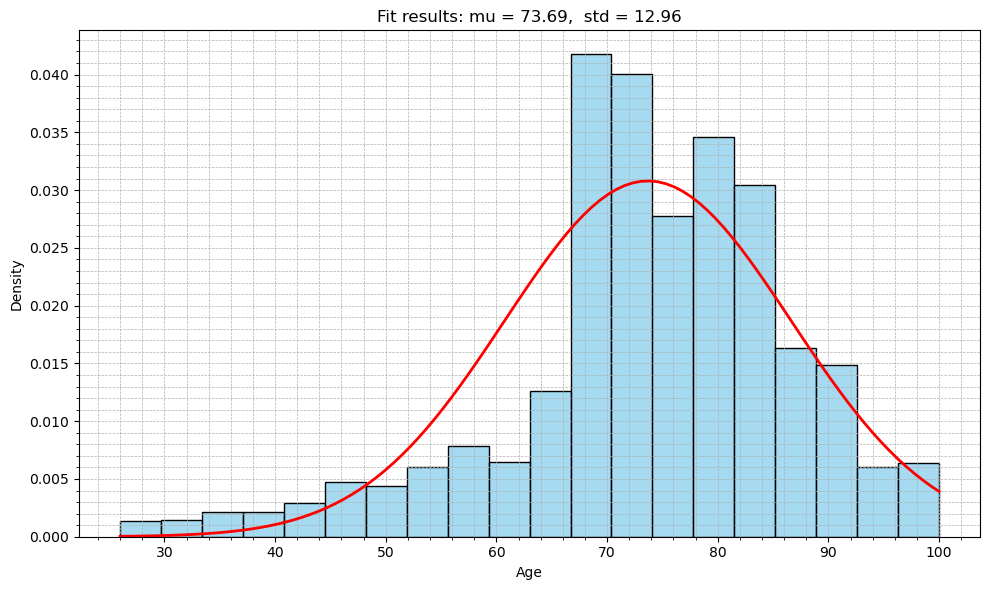

In [29]:
# Drop NaNs from 'age_in_years' before fitting
age_data = Train_Allpatientdata_copy['age_in_years']

# Fit normal distribution
mu, std = norm.fit(age_data)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=20, kde=False, stat='density', color='skyblue', edgecolor='black')

# Plot the fitted normal curve
x = np.linspace(age_data.min(), age_data.max(), 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)


plt.title(f"Fit results: mu = {mu:.2f},  std = {std:.2f}")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()


Observation

Age looks like very normaly distributed with mean age - 73.6 and standard deviation 12.9.
This plot shows age ranging from 26 to 101 with most patient age between 65 to 93.
Patients between 65 to 70 were maximum.
Let's zoom in and divide the age into age groups and see the distribution within age groups.

* 1-40 --> Young
* 41-60 --> Mid Aged
* 61-80 --> Old
* 81+ --> Very Old

In [31]:
def agd(age_in_years):
    if age_in_years <= 40:
        return 'young'
    elif 41 <= age_in_years <= 60:
        return 'mid aged'
    elif 61 <= age_in_years <= 80:
        return 'old'
    elif age_in_years >= 81:
        return 'very old'


In [32]:
Train_Allpatientdata_copy['age_group'] = Train_Allpatientdata_copy['age_in_years'].apply(agd)

In [33]:
Train_Allpatientdata_copy.groupby('age_group')['age_in_years'].value_counts()

age_group  age_in_years
mid aged   60.0            4428
           57.0            4298
           58.0            4286
           59.0            4180
           56.0            3436
                           ... 
young      30.0             767
           32.0             764
           27.0             641
           31.0             631
           26.0             361
Name: count, Length: 75, dtype: int64

YOUNG group count: 14557


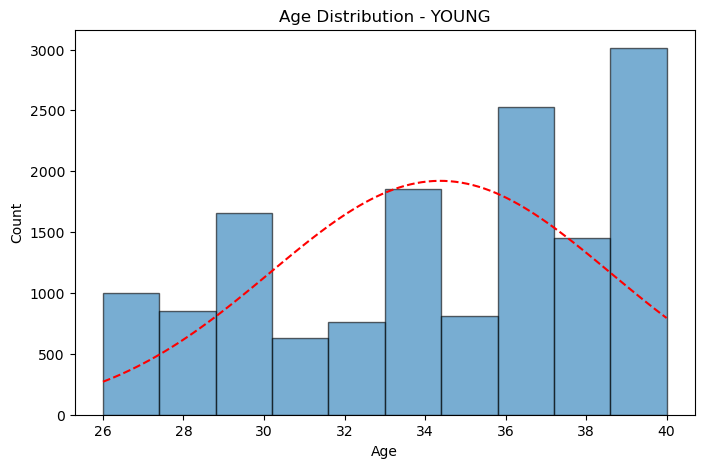

MID AGED group count: 57924


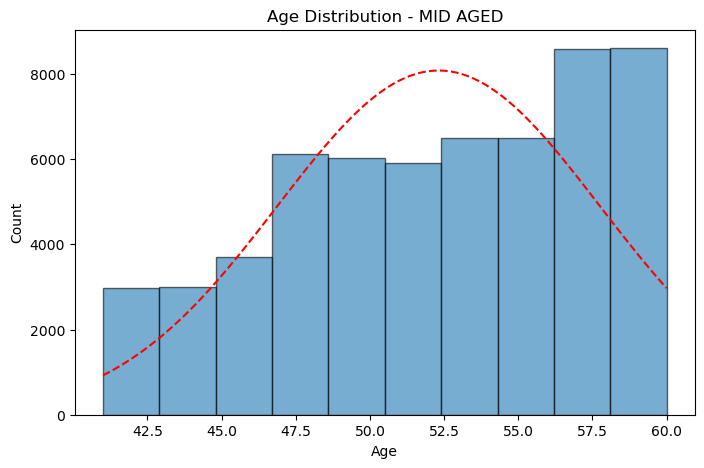

OLD group count: 314151


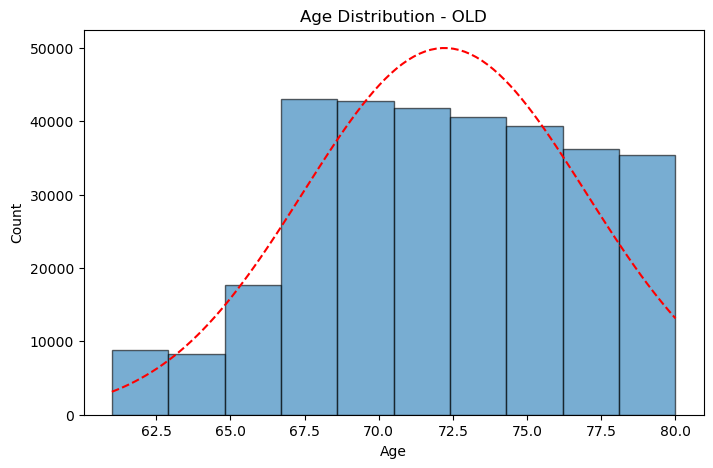

VERY OLD group count: 169901


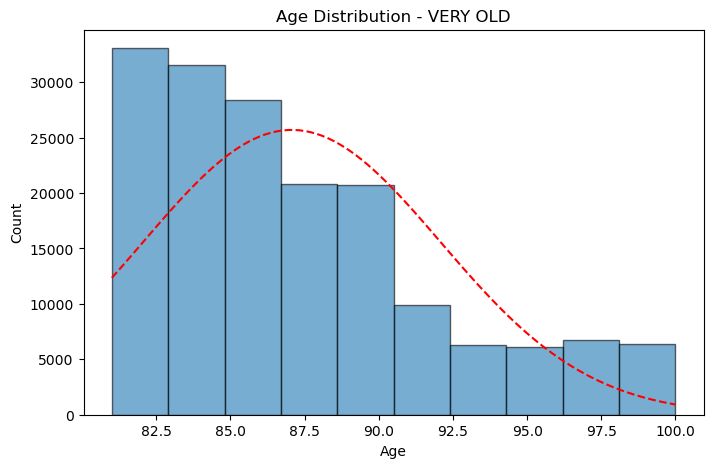

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

age_groups = ['young', 'mid aged', 'old', 'very old']

for group in age_groups:
    plt.figure(figsize=(8, 5))
    data = Train_Allpatientdata_copy[Train_Allpatientdata_copy['age_group'] == group]['age_in_years']
    
    # Plot histogram
    counts, bins, _ = plt.hist(data, bins=10, edgecolor='black', alpha=0.6)
    
    # Normal curve
    mu, std = norm.fit(data)
    x = np.linspace(bins[0], bins[-1], 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * len(data) * (bins[1] - bins[0])
    plt.plot(x, p_scaled, 'r--')

    # Labels
    plt.title(f'Age Distribution - {group.upper()}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    
    print(f'{group.upper()} group count:', len(data))
    plt.show()


In [35]:
df_doa = pd.DataFrame({
    'DOD': Train_Allpatientdata_copy['DOD'],
    'dead_or_alive': Train_Allpatientdata_copy['DOD'].apply(lambda x: 'Dead' if pd.isna(x) else 'Alive')
})


In [36]:
df_doa

,DOD,dead_or_alive
0,NaT,Dead
1,NaT,Dead
2,NaT,Dead
3,NaT,Dead
4,NaT,Dead
...,...,...
558206,NaT,Dead
558207,NaT,Dead
558208,NaT,Dead
558209,NaT,Dead


In [37]:
df_doa.dead_or_alive.value_counts()

dead_or_alive
Dead     552402
Alive      4131
Name: count, dtype: int64

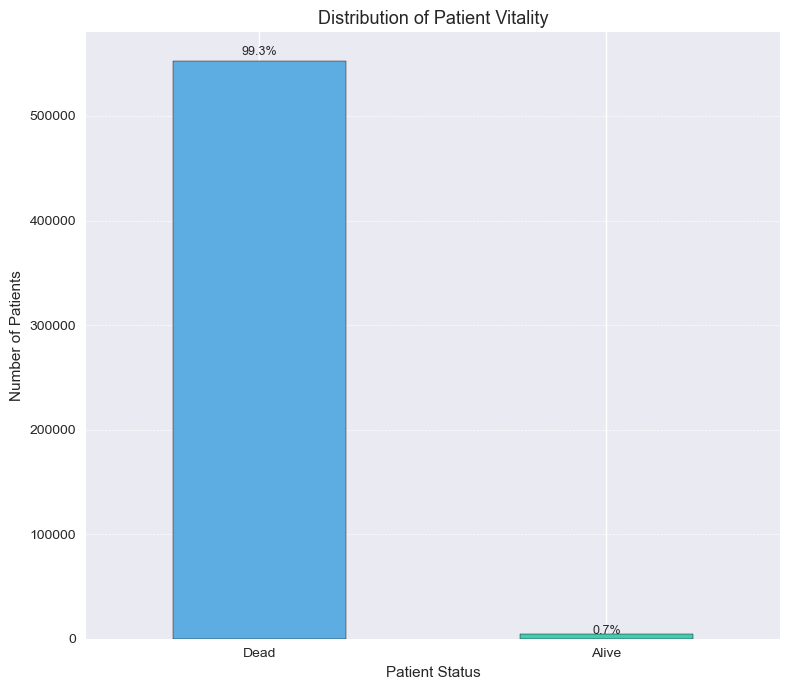

In [38]:

with plt.style.context('seaborn-v0_8'):
    plt.figure(figsize=(8, 7))  # Plot size

    ax = df_doa['dead_or_alive'].value_counts().plot(kind='bar', color=['#5DADE2', '#48C9B0'], edgecolor='black')

    total = df_doa.shape[0]
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height * 1.01
        ax.annotate(f"{height / total * 100:.1f}%", (x, y), ha='center', fontsize=9)

    # Customization
    plt.xlabel('Patient Status')
    plt.ylabel('Number of Patients')
    plt.title('Distribution of Patient Vitality', fontsize=13)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()


This plot suggests that 99% patients are dead and 1 % are alive. This requires further investigation in bivariate or multivariate analysis.

# Exploring **Race**

In [41]:
Train_Allpatientdata_copy.Race.value_counts()

Race
1    469572
2     55481
3     19683
5     11797
Name: count, dtype: int64

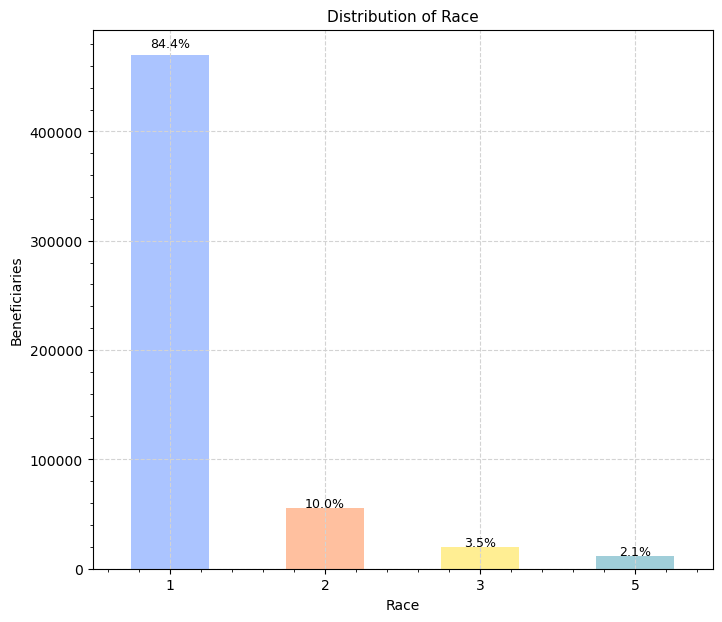

In [42]:

plt.figure(figsize=(8,7))  # Defining plot size

# Creating the bar plot
fig = Train_Allpatientdata_copy.Race.value_counts().plot(kind='bar', color=['#abc4ff', '#ffc09f', '#ffee93', '#a0ced9'])

# Adding annotations for bar height
for p in fig.patches:
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height / Train_Allpatientdata_copy.shape[0] * 100, 1)}%', (x + p.get_width() / 2, y + height * 1.015), 
                 ha='center', fontsize=9)

plt.minorticks_on()
plt.xlabel('Race')
plt.ylabel('Beneficiaries')
plt.xticks(rotation=False)
plt.grid(which='major', linestyle='--', color='lightgrey')
plt.title('Distribution of Race', fontsize=11)

plt.show()


📊 Plot a bar chart showing the distribution of beneficiary races with percentage annotations, formatted for clarity and readability.



Exploring **RenalDiseaseIndicator**

Acute Kidney Disease : Acute kidney injury (AKI), previously known as acute renal failure (ARF), is a sudden decrease in kidney function that can range from mild to severe. It can occur due to a number of possible reasons.

Chronic Kidney Disease : Chronic kidney disease (CKD) is a long-term condition that occurs when the kidneys are damaged and can't filter blood properly. It can be caused by a number of conditions, including diabetes, high blood pressure, autoimmune disorders, and kidney stones.

In [46]:
Train_Allpatientdata_copy.RenalDiseaseIndicator.value_counts()

RenalDiseaseIndicator
0    447176
Y    109357
Name: count, dtype: int64

📈 Count the number of beneficiaries with and without renal disease using the `RenalDiseaseIndicator` column to assess its distribution.


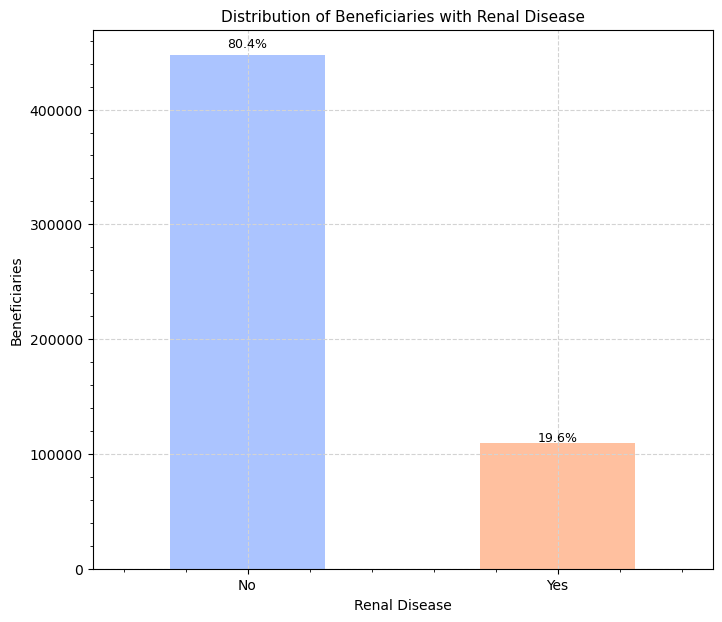

In [48]:

plt.figure(figsize=(8,7))  # Defining plot size

# Creating the bar plot
fig = Train_Allpatientdata_copy.RenalDiseaseIndicator.value_counts().plot(kind='bar', color=['#abc4ff', '#ffc09f'])

# Adding annotations for bar height
for p in fig.patches:
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height / Train_Allpatientdata_copy.shape[0] * 100, 1)}%', (x + p.get_width() / 2, y + height * 1.015), 
                 ha='center', fontsize=9)

plt.minorticks_on()
plt.xlabel('Renal Disease')
plt.ylabel('Beneficiaries')
plt.xticks(labels=['No', 'Yes'], ticks=(0, 1), rotation=False)
plt.grid(which='major', linestyle='--', color='lightgrey')
plt.title('Distribution of Beneficiaries with Renal Disease', fontsize=11)

plt.show()


* There are approx. 20% beneficieries who has or had renal disease.

In [50]:
Train_Allpatientdata_copy.ChronicCond_KidneyDisease.value_counts()

ChronicCond_KidneyDisease
2    327331
1    229202
Name: count, dtype: int64

📊 Display the frequency of kidney disease conditions among beneficiaries, where `1` indicates absence and `2` presence of the chronic condition.


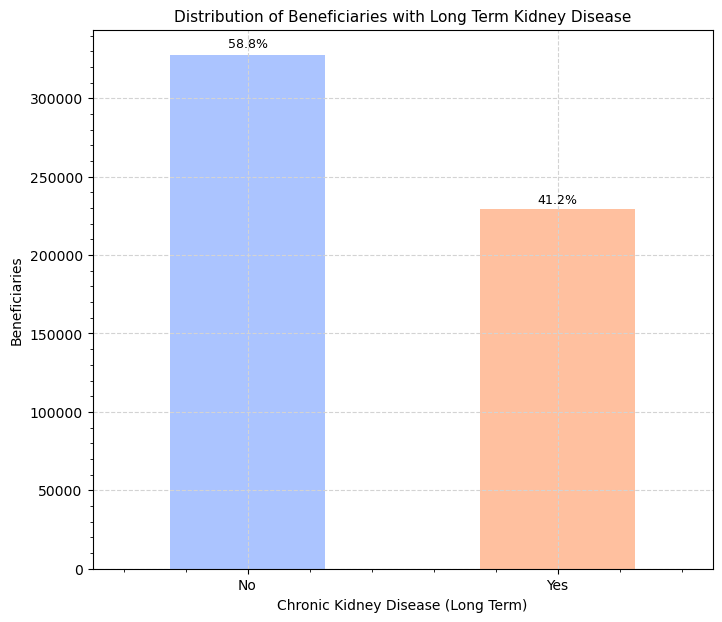

In [52]:

plt.figure(figsize=(8,7))  # Defining plot size

# Creating the bar plot
fig = Train_Allpatientdata_copy.ChronicCond_KidneyDisease.value_counts().plot(kind='bar', color=['#abc4ff', '#ffc09f'])

# Adding annotations for bar height
for p in fig.patches:
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height / Train_Allpatientdata_copy.shape[0] * 100, 1)}%', (x + p.get_width() / 2, y + height * 1.015), 
                 ha='center', fontsize=9)

plt.minorticks_on()
plt.xlabel('Chronic Kidney Disease (Long Term)')
plt.ylabel('Beneficiaries')
plt.xticks(labels=['No', 'Yes'], ticks=(0, 1), rotation=False)
plt.grid(which='major', linestyle='--', color='lightgrey')
plt.title('Distribution of Beneficiaries with Long Term Kidney Disease', fontsize=11)

plt.show()


* 41% beneficiaries had long term kidney disease.

In [54]:
pd.DataFrame(Train_Allpatientdata_copy[['RenalDiseaseIndicator', 'ChronicCond_KidneyDisease']].value_counts())

count
RenalDiseaseIndicator ChronicCond_KidneyDisease        
0                     2                          311117
                      1                          136059
Y                     1                           93143
                      2                           16214

📊 Show the cross-tabulation of renal disease indicator with chronic kidney disease status to explore their relationship and consistency in labeling.


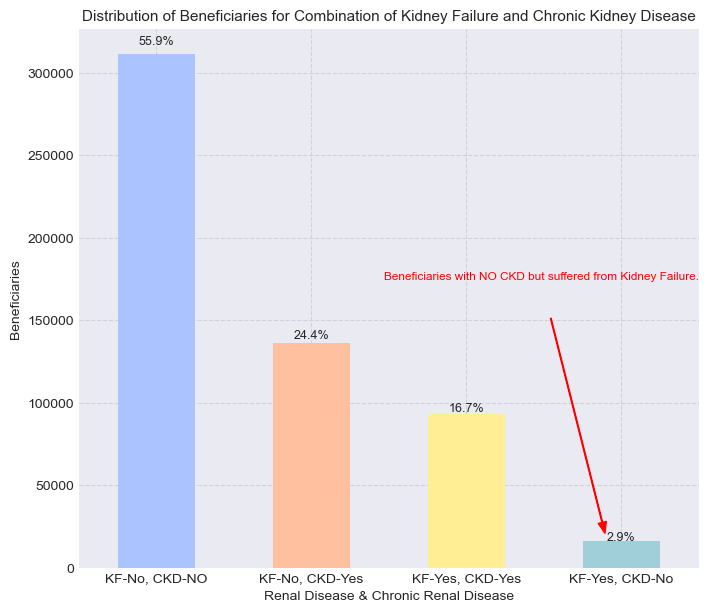

In [56]:

with plt.style.context('seaborn-v0_8-darkgrid'):  # Use a specific seaborn style version
    plt.figure(figsize=(8,7))  # Defining plot size

    # Creating the bar plot
    fig = Train_Allpatientdata_copy[['RenalDiseaseIndicator', 'ChronicCond_KidneyDisease']].value_counts().plot(kind='bar', color=['#abc4ff', '#ffc09f', '#ffee93', '#a0ced9'])

    # Adding annotation for one of the bars (for the specific description)
    fig.annotate('Beneficiaries with NO CKD but suffered from Kidney Failure.',
                 xy=(2.95, 0.85),  xycoords='data', xytext=(1, 0.55), textcoords='axes fraction',
                 fontsize=8.5, arrowprops=dict(facecolor='red', shrink=0.12, linewidth=1, width=0.5, headwidth=6, headlength=8, edgecolor='red'),
                 horizontalalignment='right', verticalalignment='top', color='red')

    # Adding annotations for the bar height percentages
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()

        fig.annotate(f'{round(height / Train_Allpatientdata_copy.shape[0] * 100, 1)}%', (x + width / 2, y + height * 1.02), ha='center', fontsize=9)

    plt.minorticks_on()
    plt.xlabel('Renal Disease & Chronic Renal Disease')
    plt.ylabel('Beneficiaries')
    plt.xticks(labels=['KF-No, CKD-NO', 'KF-No, CKD-Yes', 'KF-Yes, CKD-Yes', 'KF-Yes, CKD-No'], ticks=(0, 1, 2, 3), rotation=False)
    plt.grid(which='major', linestyle='--', color='lightgrey')
    plt.title('Distribution of Beneficiaries for Combination of Kidney Failure and Chronic Kidney Disease', fontsize=11)

    plt.show()


* We can see that 24% beneficiaies had long term (chronic) kidney disease but never suffered kidney failure.
* There are 2.9% beneficiaries who did not have long term (chronic) kidney disease but they suffered kidney failure.

# Exploring **County**

In [59]:
county = Train_Allpatientdata_copy["County"].value_counts().sort_values(ascending = False)

In [60]:
county[county>1000].shape

(96,)

* This looks like some counties have very high number of beneficiaries and some counties have very less number of beneficiaries.
* The above plot is showing 96 counties.
* The above plot is showing distribution of counties based on number of beneficiaries where number of beneficiearies are more than 1000

# Exploring **NoOfMonths_PartACov**

 What is part A coverage?
* 
Medicare Part A, often referred to as hospital insurance, primarily covers inpatient care in hospitals, skilled nursing facilities, hospice care, and some home health services.

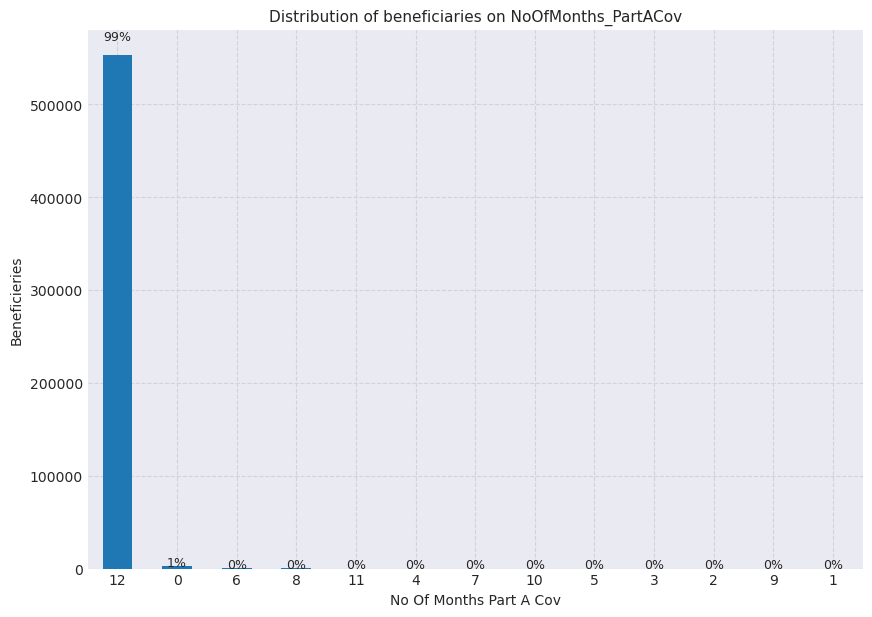

In [63]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    plt.figure(figsize=(10,7)) # defininng plot size

    fig = Train_Allpatientdata_copy.NoOfMonths_PartACov.value_counts().plot(kind = 'bar')# creting plot

    # adding annotations for bar height

    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy()

        fig.annotate(f'{str(abs(round(height/df_doa.dead_or_alive.shape[0]*100)))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=9)

    plt.minorticks_on()
    plt.xlabel('No Of Months Part A Cov')
    plt.ylabel('Beneficieries')
    plt.xticks(rotation=False)
    plt.grid(which='major',linestyle='--', color='lightgrey')
    plt.title('Distribution of beneficiaries on NoOfMonths_PartACov', fontsize=11)

* 99% of the beneficiearies have 12 month part A coverage.

#  Exploring **NoOfMonths_PartBCov**
What is part B coverage?

* Medicare Part B is a component of Original Medicare that covers medically necessary services and preventive care, such as doctor visits, outpatient care, and certain medical supplies.

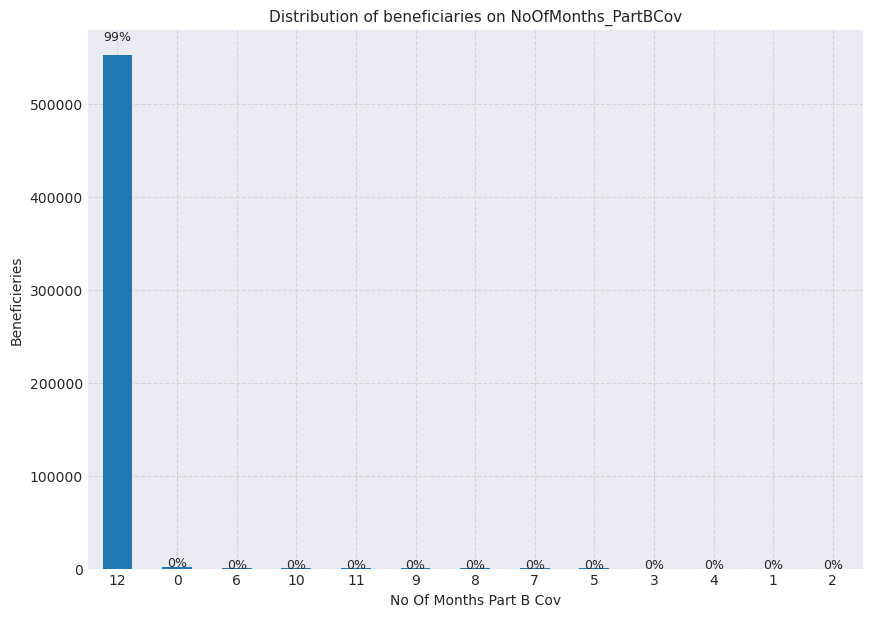

In [66]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    plt.figure(figsize=(10,7)) # defininng plot size

    fig = Train_Allpatientdata_copy.NoOfMonths_PartBCov.value_counts().plot(kind = 'bar')# creting plot

    # adding annotations for bar height

    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy()

        fig.annotate(f'{str(abs(round(height/df_doa.dead_or_alive.shape[0]*100)))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=9)

    plt.minorticks_on()
    plt.xlabel('No Of Months Part B Cov')
    plt.ylabel('Beneficieries')
    plt.xticks(rotation=False)
    plt.grid(which='major',linestyle='--', color='lightgrey')
    plt.title('Distribution of beneficiaries on NoOfMonths_PartBCov', fontsize=11)

* 99% of the beneficiearies have 12 month part A coverage.

# Exploring **Patients with Chronic Diseases**

In [69]:
df_chronic = Train_Allpatientdata_copy[[i for i in Train_Allpatientdata_copy.columns if 'Chronic' in i]]
df_chronic = df_chronic.replace(2, 0)

In [70]:
def ch(row):
  if sum(row)>0:
    return 'Yes'
  else:
    return 'No'

In [71]:
df_chronic['ChronicCond'] = [ch(df_chronic.iloc[i]) for i in range(df_chronic.shape[0])]

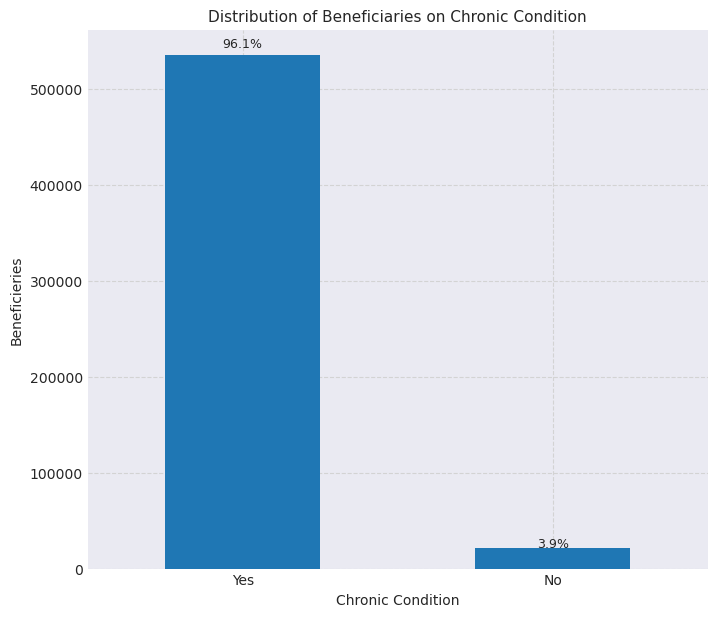

In [72]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    plt.figure(figsize=(8,7)) # defininng plot size

    fig = df_chronic['ChronicCond'].value_counts().plot(kind = 'bar')# creting plot

    # adding annotations for bar height

    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy()

        fig.annotate(f'{str(round(height/df_doa.dead_or_alive.shape[0]*100,1))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=9)

    plt.minorticks_on()
    plt.xlabel('Chronic Condition')
    plt.ylabel('Beneficieries')
    plt.xticks(rotation=False)
    plt.grid(which='major',linestyle='--', color='lightgrey')
    plt.title('Distribution of Beneficiaries on Chronic Condition', fontsize=11)

In [73]:
df_chronic['num_of_ChronicCond'] = df_chronic.iloc[:, :11].apply(pd.to_numeric, errors='coerce').sum(axis=1)

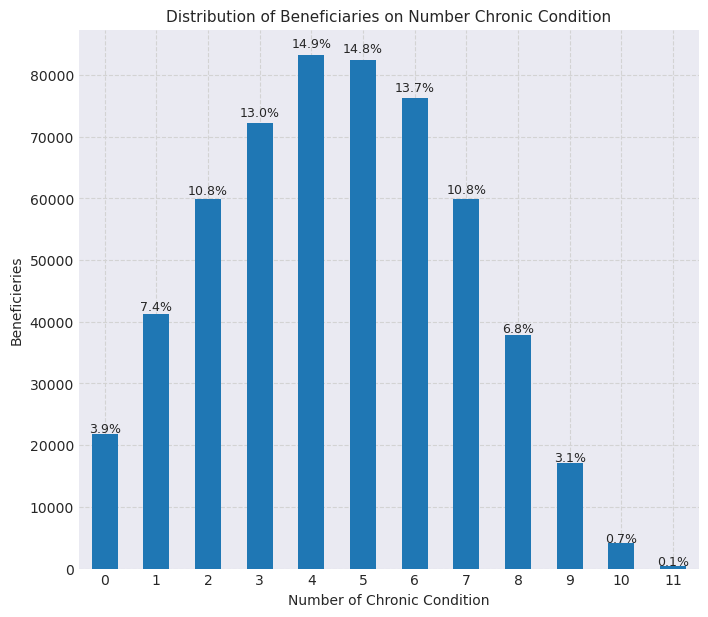

In [74]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    plt.figure(figsize=(8,7)) # defininng plot size

    fig = df_chronic['num_of_ChronicCond'].value_counts().sort_index().plot(kind = 'bar')# creting plot

    # adding annotations for bar height

    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy()

        fig.annotate(f'{str(round(height/df_doa.dead_or_alive.shape[0]*100,1))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=9)

    plt.minorticks_on()
    plt.xlabel('Number of Chronic Condition')
    plt.ylabel('Beneficieries')
    plt.xticks(rotation=False)
    plt.grid(which='major',linestyle='--', color='lightgrey')
    plt.title('Distribution of Beneficiaries on Number Chronic Condition', fontsize=11)

* 91.9% of beneficiaries had at least 1 chronic condition where in,
* Only 3.9% beneficiaries had no chronic condition.
* 7.4% beneficiaries has 1 chronic condition.
* 38.7% beneficiaries has 2 to 4 chronic condition.
* 50% beneficiaries has 5+ chronic condition.


| Chronic Condition              | Impact on Life Expectancy                  | Impact on Quality of Life                                   |
|-------------------------------|--------------------------------------------|-------------------------------------------------------------|
| ChronicCond_Alzheimer         | Moderate to High                           | High (severe cognitive decline)                             |
| ChronicCond_Heartfailure      | High                                       | High (shortness of breath, fatigue)                         |
| ChronicCond_KidneyDisease     | High                                       | High (dialysis, fatigue, dietary restrictions)              |
| ChronicCond_Cancer            | High (varies by type)                      | High (pain, fatigue, treatment side effects)                |
| ChronicCond_ObstrPulmonary    | High                                       | High (breathing difficulties, physical limitations)         |
| ChronicCond_Depression        | Low (but can be moderate if untreated)     | High (mental and emotional distress)                        |
| ChronicCond_Diabetes          | Moderate (if unmanaged)                    | Moderate to High (complications such as neuropathy)         |
| ChronicCond_IschemicHeart     | High                                       | High (chest pain, physical limitations)                     |
| ChronicCond_Osteoporasis      | Low                                        | Moderate (fracture risk, mobility issues)                   |
| ChronicCond_rheumatoidarthritis | Low                                     | Moderate to High (pain, joint damage, mobility issues)      |
| ChronicCond_stroke            | High                                       | High (mobility, speech, and cognitive impairments)          |


In [77]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:
        return 2
    else:
        return 3
    
phy_same = Train_Allpatientdata_copy.apply(physician_same, axis=1)

In [78]:
Train_Allpatientdata_copy['phy_same']=phy_same

In [79]:

le = LabelEncoder()
Train_Allpatientdata_copy['Provider'] = le.fit_transform(Train_Allpatientdata_copy['Provider'])
Train_Allpatientdata_copy['ClaimID'] = le.fit_transform(Train_Allpatientdata_copy['ClaimID'])
Train_Allpatientdata_copy['BeneID'] = le.fit_transform(Train_Allpatientdata_copy['BeneID'])
Train_Allpatientdata_copy['ClmAdmitDiagnosisCode'] = le.fit_transform(Train_Allpatientdata_copy['ClmAdmitDiagnosisCode'])


In [80]:
# Convert dates and calculate claim duration
Train_Allpatientdata_copy['ClaimDuration'] = pd.to_datetime(Train_Allpatientdata_copy['ClaimEndDt']) - pd.to_datetime(Train_Allpatientdata_copy['ClaimStartDt'])
Train_Allpatientdata_copy.drop(['ClaimStartDt', 'ClaimEndDt'], axis=1, inplace=True)

Train_Allpatientdata_copy['TotalDeductiblePaid'] = Train_Allpatientdata_copy['IPAnnualDeductibleAmt'] + Train_Allpatientdata_copy['OPAnnualDeductibleAmt']

Train_Allpatientdata_copy['TotalReimbursement'] = Train_Allpatientdata_copy['IPAnnualReimbursementAmt'] + Train_Allpatientdata_copy['OPAnnualReimbursementAmt']

chrond_col = [col for col in Train_Allpatientdata_copy.columns if 'ChronicCond' in col]
Train_Allpatientdata_copy['ChronicCondCount'] = Train_Allpatientdata_copy[chrond_col].sum(axis=1)


In [81]:
Train_Allpatientdata_copy.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Isch

In [82]:
Train_Allpatientdata_copy.ClaimDuration

0        0 days
1        0 days
2        0 days
3        0 days
4        2 days
          ...  
558206   0 days
558207   0 days
558208   0 days
558209   0 days
558210   0 days
Name: ClaimDuration, Length: 556533, dtype: timedelta64[ns]

In [83]:
#claim_duration = ClaimEndDt - ClaimStartDt
#Train_Allpatientdata_copy['claim_duration'] = (Train_Allpatientdata['ClaimEndDt'] - Train_Allpatientdata_copy['ClaimStartDt']).dt.days

In [84]:
#length_of_stay = DischargeDt - AdmissionDt
Train_Allpatientdata_copy['AdmissionDt'] = pd.to_datetime(Train_Allpatientdata_copy['AdmissionDt'], errors='coerce')
Train_Allpatientdata_copy['DischargeDt'] = pd.to_datetime(Train_Allpatientdata_copy['DischargeDt'], errors='coerce')

Train_Allpatientdata_copy['length_of_stay'] = (Train_Allpatientdata_copy['DischargeDt'] - Train_Allpatientdata_copy['AdmissionDt']).dt.days

In [85]:
#chronic_sum = sum of all ChronicCond_* columns

chronic_cols = [col for col in Train_Allpatientdata_copy.columns if 'ChronicCond_' in col]
Train_Allpatientdata_copy['chronic_sum'] = Train_Allpatientdata_copy[chronic_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)

In [86]:
cols = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',"DOB","DOD","age_group",
       'ClmProcedureCode_5', 'ClmProcedureCode_6',"BeneID","ClaimID","AttendingPhysician","OperatingPhysician","OtherPhysician","ClaimDuration","AdmissionDt","DischargeDt"]
#"ClaimStartDt","ClaimEndDt",

In [87]:
final_df=Train_Allpatientdata_copy.drop(columns=cols)

In [88]:
final_cc=final_df.dropna().reset_index()

In [89]:
final_cc["RenalDiseaseIndicator"] = (final_cc["RenalDiseaseIndicator"].map({'Y': 1, '0': 0}).fillna(-1).astype(int))
final_cc = final_cc[final_cc["DiagnosisGroupCode"] != 'OTH']

In [90]:
final_cc

,index,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,age_in_years,phy_same,TotalDeductiblePaid,TotalReimbursement,ChronicCondCount,length_of_stay,chronic_sum
0,16,3112,12000,1068.0,2768,302,2,2,0,33,20,12,12,1,1,2,2,1,1,1,1,2,2,1,12250,1068,1760,660,Yes,71.0,3,1728,14010,15,25.0,15
1,30,1524,3000,1068.0,1577,316,2,1,1,15,210,12,12,2,1,1,2,1,2,1,1,1,2,2,14270,2136,1880,700,No,67.0,3,2836,16150,16,2.0,16
2,40,5042,17000,1068.0,2163,674,2,1,0,50,160,12,12,1,2,1,2,1,2,1,1,2,2,2,17000,1068,160,20,Yes,58.0,3,1088,17160,17,6.0,17
3,41,3095,4000,1068.0,690,630,1,1,1,32,240,12,12,2,2,2,2,2,2,2,1,2,2,2,4400,1068,200,140,Yes,71.0,3,1208,4600,21,4.0,21
4,54,3931,8000,1068.0,3010,187,1,1,0,39,560,12,12,2,1,1,1,1,2,1,1,2,1,2,13400,2136,1050,760,No,82.0,3,2896,14450,15,16.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39414,558091,488,7000,1068.0,1880,176,1,1,0,5,430,12,12,1,1,2,2,2,2,2,1,2,2,2,7000,1068,100,60,Yes,73.0,3,1128,7100,19,2.0,19
39415,558111,853,11000,1068.0,2148,226,2,1,0,23,620,12,12,1,1,1,2,2,2,1,1,2,2,2,11000,1068,0,0,Yes,75.0,3,1068,11000,17,6.0,17
39416,558115,3181,14000,1068.0,2191,699,1,1,0,33,400,12,12,2,1,2,2,2,2,2,1,2,2,2,17000,1068,450,470,Yes,80.0,1,1538,17450,20,6.0,20
39417,558150,4436,3000,1068.0,2925,895,2,1,0,45,960,12,12,1,1,2,2,2,1,1,1,2,2,2,3000,1068,6230,990,Yes,61.0,3,2058,9230,17,2.0,17


In [91]:
X = final_cc.drop(columns=['PotentialFraud'])
y = final_cc['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Decision Tree Classifier

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit model
#model = RandomForestClassifier()
model1=DecisionTreeClassifier()

#model.fit(X_train, y_train)
model1.fit(X_train, y_train)

# 5. Evaluate
#y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test)

#print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3352
           1       0.94      0.94      0.94      4510

    accuracy                           0.93      7862
   macro avg       0.93      0.93      0.93      7862
weighted avg       0.93      0.93      0.93      7862



* achieved an accuracy of 93% with Decision tree

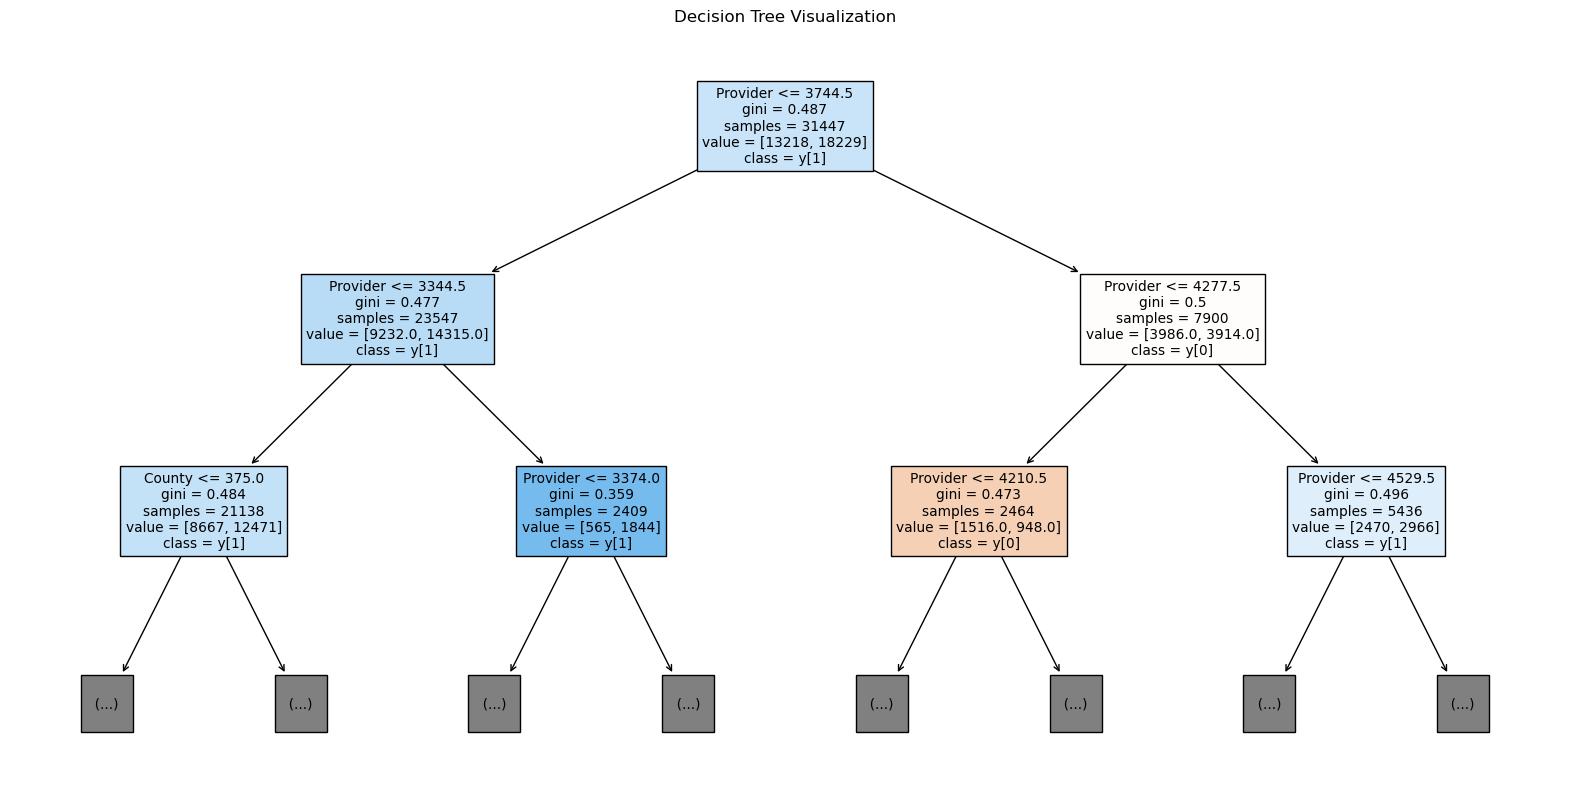

In [95]:
plt.figure(figsize=(20,10))
plot_tree(model1, filled=True, feature_names=X.columns, class_names=True,max_depth =2)
plt.title("Decision Tree Visualization")
plt.show()


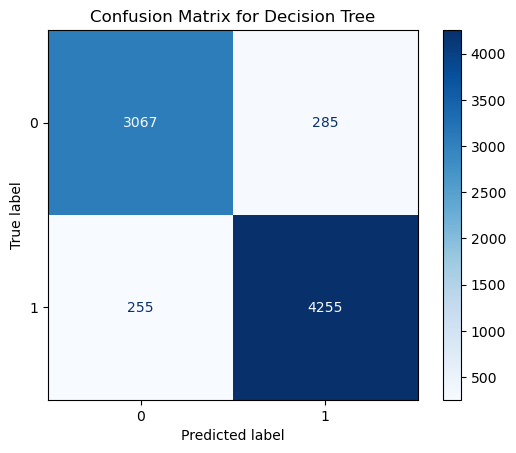

In [96]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

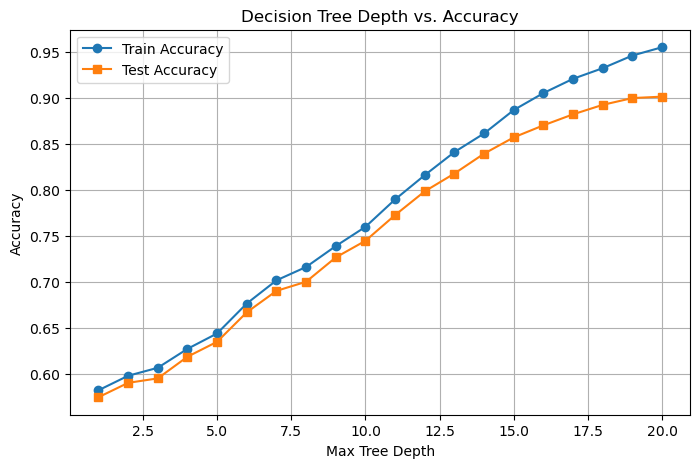

In [97]:
depths = range(1, 21)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [5, 10, 13, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize a DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.8901334426754159
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3352
           1       0.91      0.92      0.92      4510

    accuracy                           0.90      7862
   macro avg       0.90      0.90      0.90      7862
weighted avg       0.90      0.90      0.90      7862



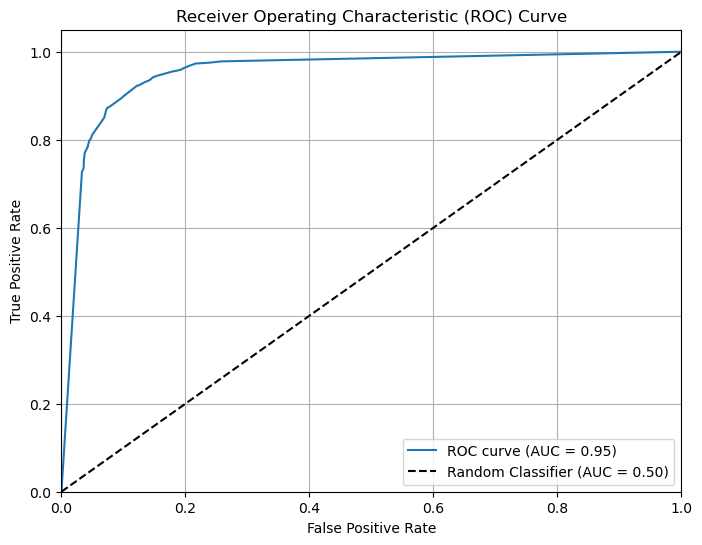

In [99]:
# Get predicted probabilities for the positive class (class 1)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


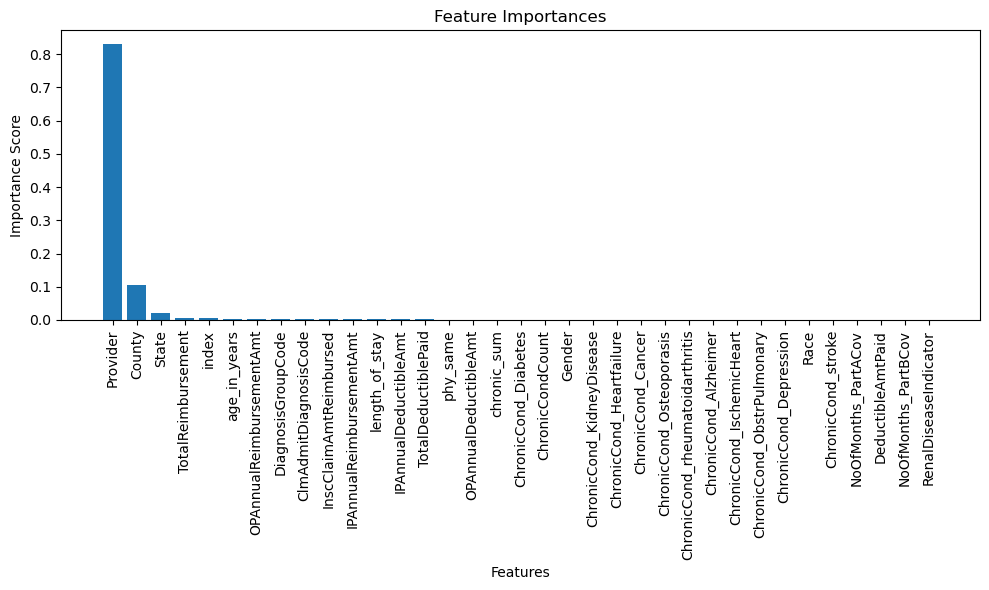

In [100]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Get feature names (replace X.columns if using a DataFrame, otherwise use generic names)
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


# Random Forest Classifier

In [102]:
# 4. Fit model
model = RandomForestClassifier()

model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56      3352
           1       0.68      0.84      0.75      4510

    accuracy                           0.68      7862
   macro avg       0.68      0.66      0.66      7862
weighted avg       0.68      0.68      0.67      7862



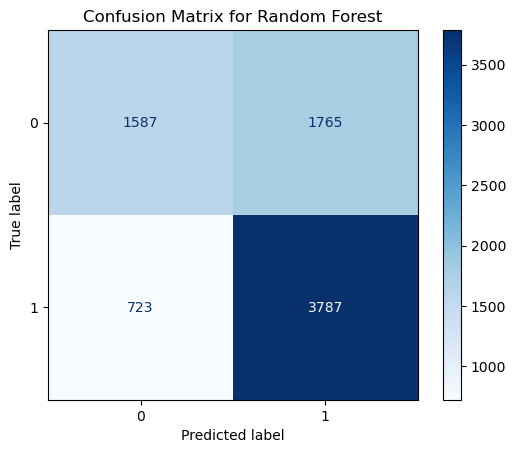

In [103]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

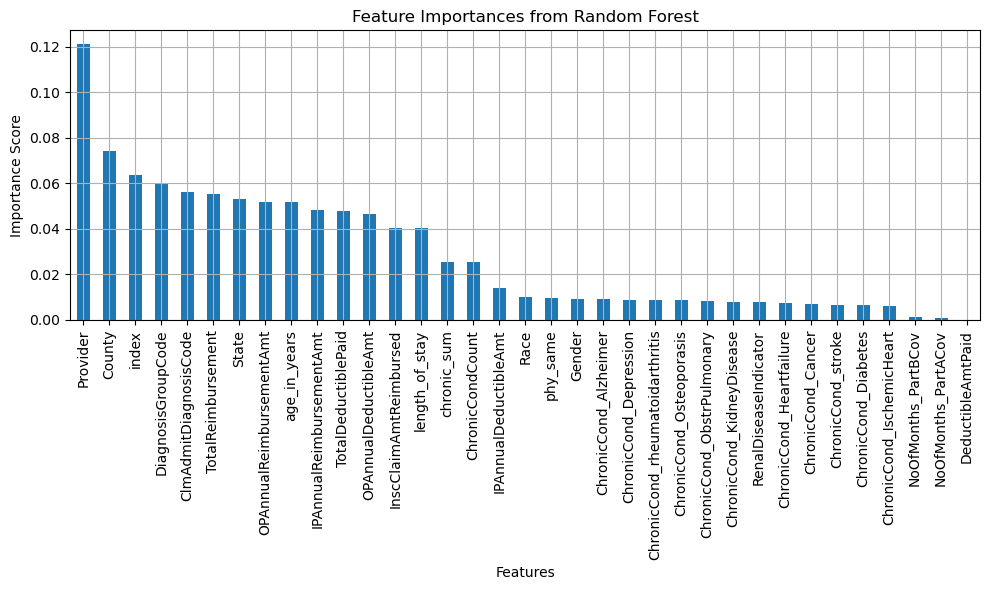

In [177]:
#X_train is a DataFrame and has column names
feature_names = X_train.columns

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a Series with actual feature names
feat_importances = pd.Series(importances, index=feature_names)

# Sort feature importances
feat_importances_sorted = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.grid(True)
plt.show()
